In [1]:
import os
import pandas as pd

In [2]:
movies = pd.read_csv('../data/tmdb_5000_movies.csv')
credits = pd.read_csv('../data/tmdb_5000_credits.csv')

In [3]:
print(movies.shape)
print(credits.shape)

(4803, 20)
(4803, 4)


In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
credits.head(2)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [6]:
movies = movies.merge(credits,on='title')
movies.shape

(4809, 23)

In [7]:
movies['status'].value_counts()

status
Released           4801
Rumored               5
Post Production       3
Name: count, dtype: int64

<Figure size 640x480 with 0 Axes>

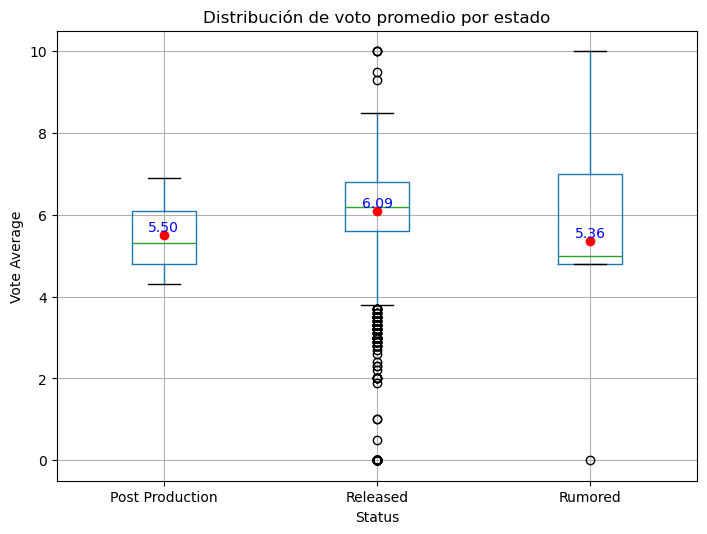

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
plt.tight_layout()


fig, ax = plt.subplots(figsize=(8,6))

movies.boxplot(column='vote_average', by='status', ax=ax)

medias = movies.groupby('status')['vote_average'].mean()

# Poner los promedios sobre la gráfica
for i, (status, media) in enumerate(medias.items(), start=1):  # start=1 porque los boxplots de Pandas indexan desde 1
    ax.scatter(i, media, color='red', zorder=3)  # rojo para el promedio
    ax.text(i, media+0.10, f'{media:.2f}', ha='center', color='blue')  # muestra el número

ax.set_title('Distribución de voto promedio por estado')
ax.set_xlabel('Status')
ax.set_ylabel('Vote Average')
plt.suptitle('')
plt.show()


In [9]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [10]:
movies.isnull().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [11]:
movies = movies.dropna(inplace=False)

In [12]:
movies.isnull().sum()

movie_id    0
title       0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [13]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [14]:
movies.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [15]:
import ast

def convert(text: str=None):
    l = []
    for i in ast.literal_eval(text):
        l.append(i['name'])
    return l

In [16]:
movies['genres'] = movies['genres'].map(convert)
movies['keywords'] = movies['keywords'].map(convert)

In [17]:
movies.head(2)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [18]:
def convert_cst(text: str=None):
    l = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            l.append(i['name'])
        counter +=1
    return l

In [19]:
movies['cast'] = movies['cast'].map(convert_cst)

In [20]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [21]:
movies.iloc[0]['crew']

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [22]:
def fetch_director(text: str=None):
    l = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Producer':
            l.append(i['name'])
            break
    return l

In [23]:
movies['crew'] = movies['crew'].map(fetch_director)

In [24]:
movies['overview'] = movies['overview'].map(lambda x:x.split())

In [25]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Jerry Bruckheimer]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Barbara Broccoli]


In [26]:
def remove_space(word):
    l = []
    for i in word:
        l.append(i.replace(" ",""))
    return l

In [27]:
movies['cast'] = movies['cast'].map(remove_space)
movies['crew'] = movies['crew'].map(remove_space)
movies['genres'] = movies['genres'].map(remove_space)
movies['keywords'] = movies['keywords'].map(remove_space)

In [28]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[JerryBruckheimer]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[BarbaraBroccoli]


In [29]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [30]:
movies.head(3)

,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[JerryBruckheimer],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[BarbaraBroccoli],"[A, cryptic, message, from, Bond’s, past, send..."


In [31]:
new_movies = movies[['movie_id','title','tags']]

In [32]:
new_movies.head(3)

,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."


In [33]:
new_movies['tags'] = new_movies['tags'].map(lambda x: " ".join(x))

/var/folders/8r/343rrfbs0gz7zy6149nd6hx40000gq/T/ipykernel_65589/4239493604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].map(lambda x: " ".join(x))


In [34]:
new_movies['tags'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. Action Adventure Fantasy ScienceFiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d SamWorthington ZoeSaldana SigourneyWeaver JamesCameron'

In [35]:
new_movies['tags'] = new_movies['tags'].map(lambda x:x.lower())

/var/folders/8r/343rrfbs0gz7zy6149nd6hx40000gq/T/ipykernel_65589/2519259492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].map(lambda x:x.lower())


In [36]:
new_movies['tags'][0]

'in the 22nd century, a paraplegic marine is dispatched to the moon pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization. action adventure fantasy sciencefiction cultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3d samworthington zoesaldana sigourneyweaver jamescameron'

In [38]:
import nltk
from nltk.stem import PorterStemmer

In [39]:
ps = PorterStemmer()

In [41]:
def stems(text:str):
    l = []
    for i in text.split():
        l.append(ps.stem(i))
    return l

In [42]:
new_movies['tags'] = new_movies['tags'].map(stems)

/var/folders/8r/343rrfbs0gz7zy6149nd6hx40000gq/T/ipykernel_65589/2286763828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].map(stems)


In [55]:
new_movies['tags'] = new_movies['tags'].apply(lambda x: ' '.join(x))

/var/folders/8r/343rrfbs0gz7zy6149nd6hx40000gq/T/ipykernel_65589/446193046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_movies['tags'] = new_movies['tags'].apply(lambda x: ' '.join(x))


In [56]:
new_movies['tags']

0       in the 22nd century, a parapleg marin is dispa...
1       captain barbossa, long believ to be dead, ha c...
2       a cryptic messag from bond’ past send him on a...
3       follow the death of district attorney harvey d...
4       john carter is a war-weary, former militari ca...
                              ...                        
4804    el mariachi just want to play hi guitar and ca...
4805    a newlyw couple' honeymoon is upend by the arr...
4806    "signed, sealed, delivered" introduc a dedic q...
4807    when ambiti new york attorney sam is sent to s...
4808    ever sinc the second grade when he first saw h...
Name: tags, Length: 4806, dtype: object

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [58]:
vector = cv.fit_transform(new_movies['tags']).toarray()

In [68]:
vector.shape

(4806, 5000)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.08458258, 0.08718573, ..., 0.04559608, 0.        ,
        0.        ],
       [0.08458258, 1.        , 0.06063391, ..., 0.02378257, 0.        ,
        0.02615329],
       [0.08718573, 0.06063391, 1.        , ..., 0.02451452, 0.        ,
        0.        ],
       ...,
       [0.04559608, 0.02378257, 0.02451452, ..., 1.        , 0.03962144,
        0.04229549],
       [0.        , 0.        , 0.        , ..., 0.03962144, 1.        ,
        0.08714204],
       [0.        , 0.02615329, 0.        , ..., 0.04229549, 0.08714204,
        1.        ]], shape=(4806, 4806))

In [63]:
similarity.shape

(4806, 4806)

In [64]:
new_movies[new_movies['title'] == 'Spider-Man'].index[0]

np.int64(159)

In [65]:
def recomemnd(movie):
    index = new_movies[new_movies['title'] == movie].index[0]
    distance = sorted(list(enumerate(similarity[index])),reverse=True,key=lambda x:x[1])
    for i in distance[1:6]:
        print(new_movies.iloc[i[0]].title)

In [71]:
recomemnd('Avatar')

Aliens vs Predator: Requiem
Falcon Rising
Independence Day
Titan A.E.
Aliens


In [ ]:
import pickle 
os.makedirs('../artifacts',exist_ok=True)
pickle.dump(new_movies, open('../artifacts/movie_list.pkl','wb'))
pickle.dump(similarity, open('../artifacts/similarity.pkl','wb'))